# Building interpretable GAMs in Python 

## Build a linear GAM for regression

In [1]:
## load required python packages
import pandas as pd
import numpy as np

# ! pip install pygam
from pygam import LinearGAM, LogisticGAM

import matplotlib.pyplot as plt

In [2]:
redwine = pd.read_csv("data/redwine-quality.csv")

In [3]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Prepare the data set

In [4]:
redwine_X = redwine.drop(['quality'], axis=1).values
redwine_y = redwine['quality']

## Build the model via gridsearch

In [5]:
lams = np.random.rand(100, 11)
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).gridsearch(redwine_X, redwine_y, lam=lams)

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

(100, 11)


100% (100 of 100) |######################| Elapsed Time: 0:00:28 Time:  0:00:28


In [6]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     36.1394
Link Function:                     IdentityLink Log Likelihood:                                 -1965.0842
Number of Samples:                         1599 AIC:                                             4004.4471
                                                AICc:                                            4006.2621
                                                GCV:                                                0.4089
                                                Scale:                                              0.3923
                                                Pseudo R-Squared:                                   0.4117
Feature Function                  Lam

/home/alinemati/anaconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


## Partial dependency plots

<Figure size 432x288 with 0 Axes>

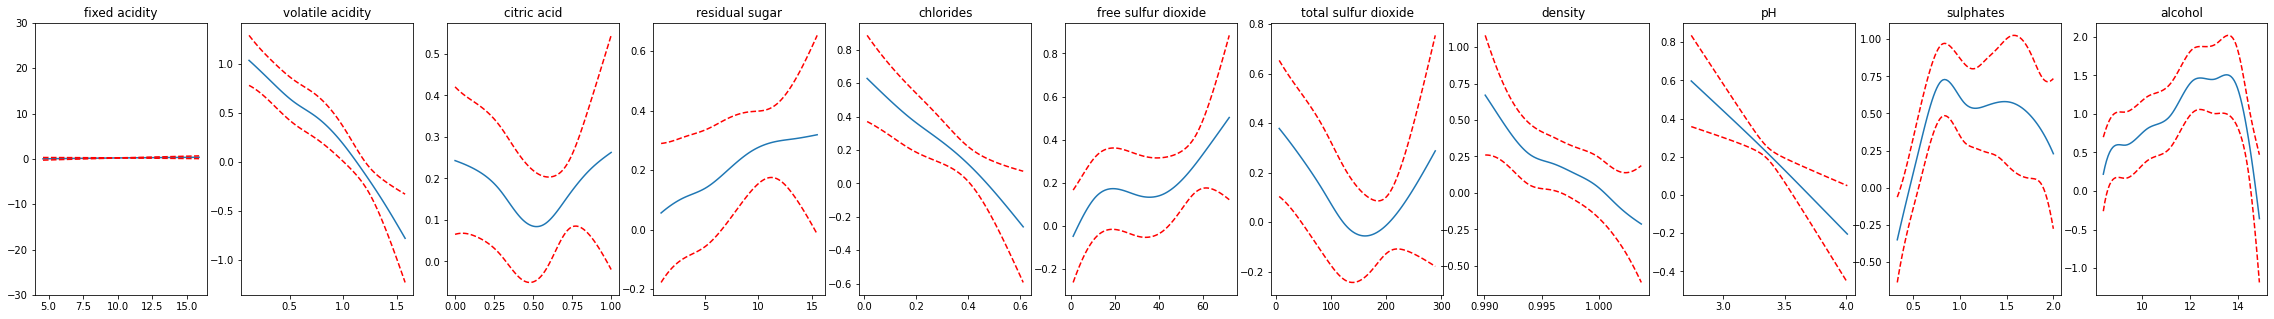

In [7]:
titles = redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(40, 5))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

## Build the model for classification

In [8]:
tumors = pd.read_csv("data/tumors.csv")

In [9]:
tumors.iloc[:,:11].head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


## Prepare the data set

In [10]:
# drop the id column
tumors = tumors.drop(['id'],axis=1)

# encode the diagnosis column
tumors.loc[tumors['diagnosis']=='M','diagnosis'] =1
tumors.loc[tumors['diagnosis']=='B','diagnosis'] =0


tumors_X = tumors.iloc[:,:11].drop(['diagnosis'], axis=1).round(2).values
tumors_y = tumors['diagnosis']

## Build the model with LogisticGAM

In [14]:
log_gam = LogisticGAM(n_splines=20).gridsearch(tumors_X, tumors_y)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/home/alinemati/anaconda3/envs/python_env/lib/python3.7/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/home/alinemati/anaconda3/envs/python_env/lib/python3.7/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
/home/alinemati/anaconda3/envs/python_env/lib/python3.7/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
/home/alinemati/anaconda3/envs/python_env/lib/python3.7/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/home/alinemati/anaconda3/envs/python_env/lib/python3.7/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)

In [15]:
log_gam.accuracy(tumors_X, tumors_y)

0.9578207381370826

## Create the partial dependency plots to show interpretability

<Figure size 432x288 with 0 Axes>

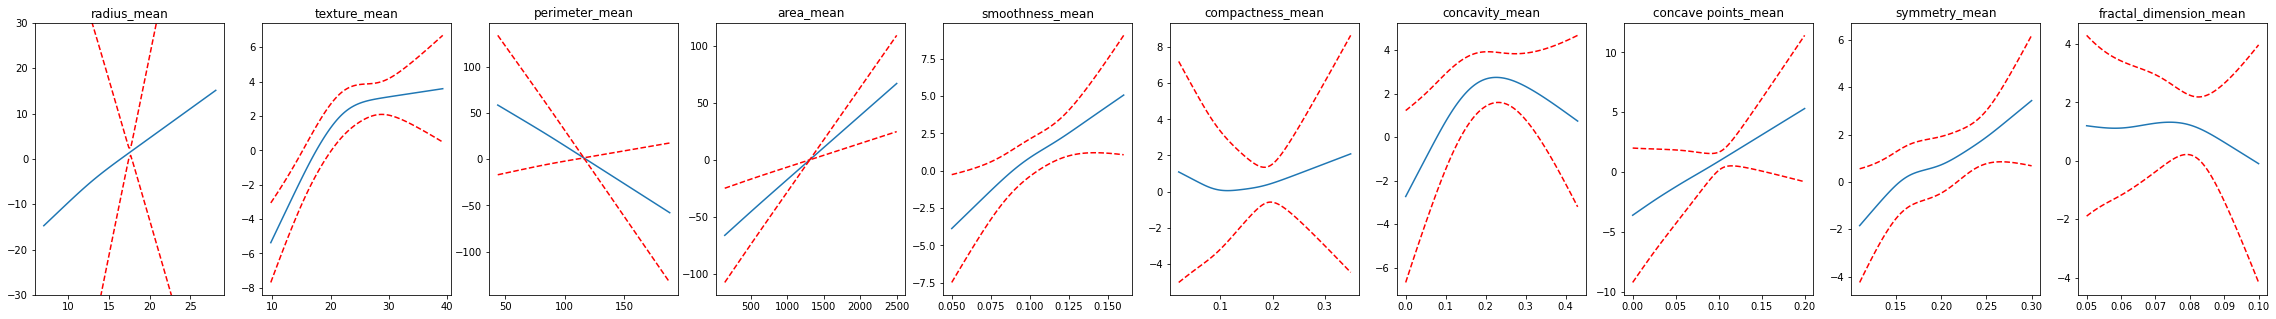

In [16]:
titles = tumors.columns[1:11]
plt.figure()
fig, axs = plt.subplots(1,10,figsize=(40, 5))

for i, ax in enumerate(axs):
    XX = log_gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], log_gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], log_gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])